In [ ]:
import torchvision
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Example using Faster RCNN with a ResNet-50 backbone (PyTorch)
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval(); # set model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 125MB/s]


In [ ]:
image=plt.imread('/content/jungle.jpg')
image_tensor=torchvision.transforms.functional.to_tensor(image)

In [ ]:
outputs=model([image_tensor])
predictions=outputs[0]["boxes"].data.numpy()  # numpy() use to convert into numy array
classes=outputs[0]["labels"].data.numpy()
scores=outputs[0]["scores"].data.numpy()

In [ ]:
predictions

array([[414.75064 , 214.39737 , 621.41394 , 294.11978 ],
       [ 46.53565 , 231.32645 , 160.55952 , 393.56775 ],
       [ 98.140495, 233.7098  , 217.27934 , 348.05313 ],
       [255.12842 , 237.62991 , 342.97092 , 270.3036  ]], dtype=float32)

In [ ]:
classes  # 25 - Giraf ,23 - dog, 24 - zebra (refer coco dataset labels)

array([25, 24, 24, 24])

In [ ]:
scores

array([0.9993388 , 0.9991553 , 0.99868137, 0.9965996 ], dtype=float32)

In [ ]:
for prediction, class_id, score in zip(predictions,classes,scores):
  x1,y1,x2,y2=prediction.astype(int)
  cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
  #cv2.putText(image,f"{model.names[class_id]}{score:.2f}",(x1,y1-5))

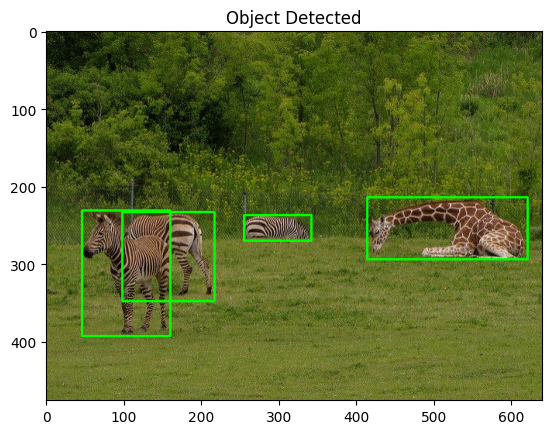

In [ ]:
plt.title('Object Detected')
plt.imshow(image);